# Classification of cats and dogs

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os

In [109]:
local_file = './cats_or_dogs.zip'
zip_file = zipfile.ZipFile(local_file,'r')
zip_file.extractall(path = 'temp')

In [110]:
train_data = os.listdir('temp/training_set')
print(f"No of classes in the training set : {len(train_data)}")
test_data = os.listdir('temp/test_set')
print(f"No of classes in the test set : {len(test_data)}")

No of classes in the training set : 3
No of classes in the test set : 3


In [111]:
# dogs in Training set
train_data_dogs = os.listdir('temp/training_set/dogs')
print(f"No of dogs images : {len(train_data_dogs)}")
# cats in training set
train_data_cats = os.listdir('temp/training_set/cats')
print(f"No of cats images : {len(train_data_cats)}")
# dogs in validation set .
test_data_dog = os.listdir('temp/test_set/dogs')
print(f"No of dogs in Test set : {len(test_data_dog)}")
# cats in validation set.
test_data_cat = os.listdir('temp/test_set/cats')
print(f"No of cats in Test set : {len(test_data_cat)}")

No of dogs images : 4000
No of cats images : 4000
No of dogs in Test set : 1011
No of cats in Test set : 1011


In [115]:
print(train_data_dogs[:10])
print(train_data_cats[:10])

['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']
['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg']


In [57]:
# Model Architecture 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])


In [60]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

In [86]:
train_data = 'temp/training_set'
test_data = 'temp/test_set'
train_datagen = ImageDataGenerator(rescale=1/255)
train_datagenerator = train_datagen.flow_from_directory(train_data,
                                        batch_size = 64,
                                        class_mode = 'binary',
                                        target_size=(150,150))

valid_datagen = ImageDataGenerator(rescale=1/255)
valid_datagenerator = valid_datagen.flow_from_directory(test_data,
                                  batch_size = 64,
                                  class_mode = 'binary',
                                  target_size = (150,150))

Found 8000 images belonging to 2 classes.
Found 2022 images belonging to 2 classes.


In [88]:
history = model.fit(train_datagenerator,
                    epochs = 15,
                   verbose = 1,
                   validation_data = valid_datagenerator)

Epoch 1/15
125/125 [==============================] - 338s 3s/step - loss: 0.8105 - accuracy: 0.5280 - val_loss: 0.6683 - val_accuracy: 0.5529
Epoch 2/15
125/125 [==============================] - 303s 2s/step - loss: 0.6424 - accuracy: 0.6173 - val_loss: 0.5854 - val_accuracy: 0.6889
Epoch 3/15
125/125 [==============================] - 291s 2s/step - loss: 0.5974 - accuracy: 0.6849 - val_loss: 0.5744 - val_accuracy: 0.6815
Epoch 4/15
125/125 [==============================] - 277s 2s/step - loss: 0.5421 - accuracy: 0.7185 - val_loss: 0.5300 - val_accuracy: 0.7295
Epoch 5/15
125/125 [==============================] - 275s 2s/step - loss: 0.5065 - accuracy: 0.7431 - val_loss: 0.5086 - val_accuracy: 0.7493
Epoch 6/15
125/125 [==============================] - 331s 3s/step - loss: 0.4636 - accuracy: 0.7739 - val_loss: 0.4963 - val_accuracy: 0.7651
Epoch 7/15
125/125 [==============================] - 329s 3s/step - loss: 0.4216 - accuracy: 0.8030 - val_loss: 0.4838 - val_accuracy: 0.7690

Text(0.5, 1.0, 'Loss_And_Validation_Loss')

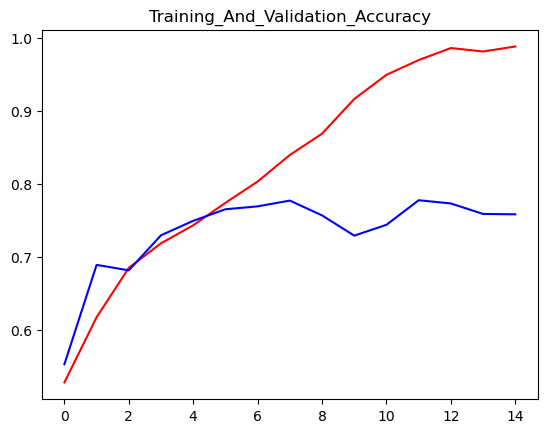

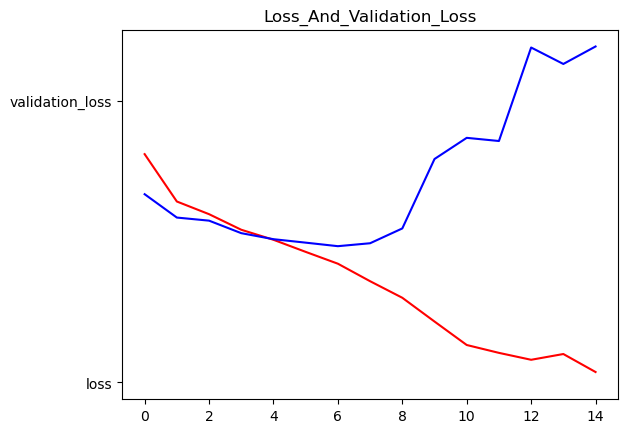

In [96]:
acc = history.history['accuracy']
val = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting the graph for accuracy
plt.plot(epochs,acc,'r',label = 'accuracy')
plt.plot(epochs,val,'b',label = 'validation_accuracy')
plt.title("Training_And_Validation_Accuracy")
plt.figure()

# Plotting the graph for loss 

plt.plot(epochs,loss,'r',"loss")
plt.plot(epochs,val_loss,'b',"validation_loss")
plt.title("Loss_And_Validation_Loss")

